# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**Note:** This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code or results.

## Overview of Dandiset 001375

This Dandiset contains data from a pilot study investigating the effect of disrupting septal GABAergic activity using DREADDs on hippocampal and neocortical activity.

You can find the Dandiset on the DANDI archive here: https://dandiarchive.org/dandiset/001375/0.250406.1855

## What this notebook covers

This notebook will demonstrate how to:

1. Load the Dandiset and list its assets using the DANDI API.
2. Load data from one of the NWB files in the Dandiset using PyNWB.
3. Explore some of the data contained within the NWB file, including raw electrophysiology, trials, spike times, and electrode information.
4. Visualize subsets of the data to gain initial insights.
5. Demonstrate a basic trial-aligned analysis.

The goal is to provide a starting point for researchers to access and begin analyzing the data in this Dandiset.

## Required Packages

This notebook requires the following Python packages:

* `dandi >= 0.6.0`
* `pynwb`
* `h5py`
* `remfile`
* `numpy`
* `matplotlib`
* `seaborn`
* `pandas`

Please ensure these packages are installed in your environment before running the notebook.

## Loading the Dandiset and listing assets

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
print("Connecting to DANDI archive...")
try:
    client = DandiAPIClient()
    dandiset = client.get_dandiset("001375", "0.250406.1855")
    print("Connected.")

    # Print basic information about the Dandiset
    metadata = dandiset.get_raw_metadata()
    print(f"\nDandiset name: {metadata.get('name', 'N/A')}")
    print(f"Dandiset URL: {metadata.get('url', 'N/A')}")

    # List some assets in the Dandiset
    print("\nListing first 5 assets:")
    assets = list(dandiset.get_assets())
    for asset in islice(assets, 5):
        print(f"- {asset.path} (ID: {asset.identifier})")
except Exception as e:
    print(f"Error loading Dandiset or listing assets: {e}")

Connecting to DANDI archive...
Connected.

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

Listing first 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16)


## Loading an NWB file

We will now load one of the NWB files from the Dandiset to explore its contents. We will use the file located at `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`.

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
print(f"Loading NWB file from: {url}")
try:
    remote_file = remfile.File(url)
    h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=h5_file)
    nwb = io.read()
    print("NWB file loaded successfully.")
except Exception as e:
    print(f"Error loading NWB file: {e}")
    nwb = None # Ensure nwb is None if loading fails

Loading NWB file from: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully.


You can explore this NWB file directly on Neurosift using the following link:

https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft

## Exploring NWB file contents

Let's examine some of the key data structures within this NWB file.

### Basic NWB file metadata

We can access various metadata fields from the loaded NWB file.

In [3]:
if nwb:
    print(f"Session description: {nwb.session_description}")
    print(f"Identifier: {nwb.identifier}")
    print(f"Session start time: {nwb.session_start_time}")
    if nwb.subject:
        print(f"Subject ID: {nwb.subject.subject_id}")
        print(f"Subject sex: {nwb.subject.sex}")
        print(f"Subject species: {nwb.subject.species}")
        print(f"Subject age: {nwb.subject.age}")
        print(f"Subject description: {nwb.subject.description}")

Session description: mouse running laps in virtual hallway
Identifier: MS13B
Session start time: 2024-07-25 19:00:00-07:00
Subject ID: MS13B
Subject sex: M
Subject species: Mus musculus
Subject age: P90D
Subject description: medial septum DREADD to suppress GABA interneurons


### Acquisition: Raw Electrophysiology Data

The NWB file contains raw electrophysiology data under `acquisition/time_series`.

In [4]:
if nwb and "time_series" in nwb.acquisition:
    time_series = nwb.acquisition["time_series"]

    print(f"Time series data shape: {time_series.data.shape}")
    print(f"Sampling rate: {time_series.rate} {time_series.starting_time_unit}")
    print(f"Data unit: {time_series.unit}")

Time series data shape: (144675584, 256)
Sampling rate: 30000.0 seconds
Data unit: mV


### Visualizing a subset of raw electrophysiology data

The raw electrophysiology data is very large, so we will load and visualize only a small segment (first 10 seconds) from the first few channels as an example.

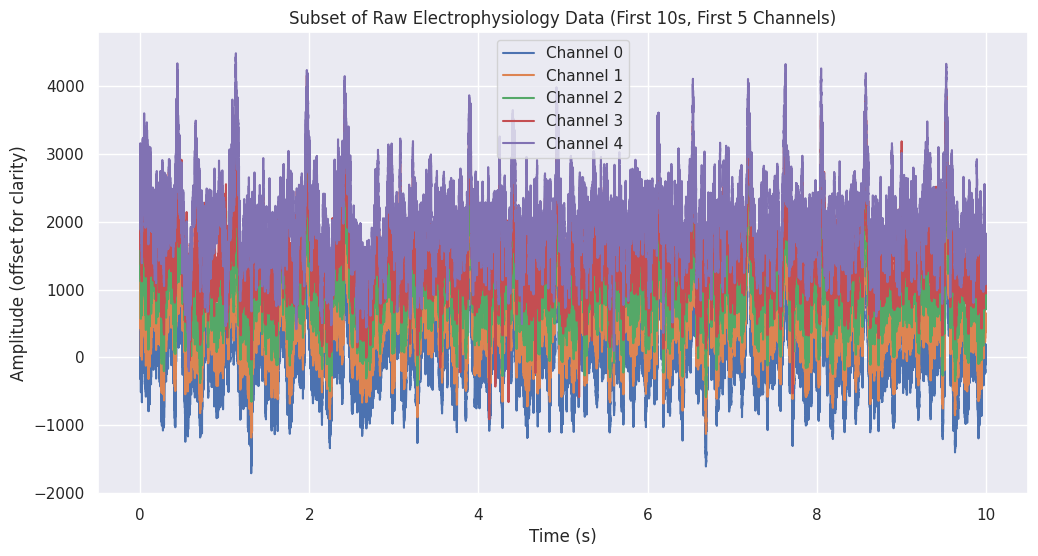

In [5]:
if nwb and "time_series" in nwb.acquisition:
    time_series = nwb.acquisition["time_series"]
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns

    sns.set_theme()

    # Load a subset of data (first 10 seconds, first 5 channels)
    num_channels_to_plot = min(5, time_series.data.shape[1])
    duration_to_plot = 10.0 # seconds
    num_samples_to_plot = min(int(duration_to_plot * time_series.rate), time_series.data.shape[0])
    data_subset = time_series.data[0:num_samples_to_plot, 0:num_channels_to_plot]
    t = time_series.starting_time + np.arange(num_samples_to_plot) / time_series.rate

    # Plot the data
    plt.figure(figsize=(12, 6))
    for i in range(num_channels_to_plot):
        plt.plot(t, data_subset[:, i] + i * 500, label=f'Channel {i}') # Offset for clarity
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (offset for clarity)')
    plt.title('Subset of Raw Electrophysiology Data (First 10s, First 5 Channels)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("NWB file not loaded or time series data not found.")

### Intervals: Trials

The NWB file contains trial information under `intervals/trials`.

In [6]:
if nwb and "trials" in nwb.intervals:
    trials_df = nwb.trials.to_dataframe()
    print("Trials DataFrame (first 5 rows):")
    print(trials_df.head())
    print(f"\nTotal number of trials: {len(trials_df)}")
else:
    print("NWB file not loaded or trials data not found.")

Trials DataFrame (first 5 rows):
    start_time  stop_time
id                       
0     4.323800  16.929833
1    16.963067  28.414333
2    28.447100  39.402833
3    39.435833  50.027033
4    50.059667  63.064467

Total number of trials: 387


### Visualizing trial durations

Let's visualize the distribution of trial durations.

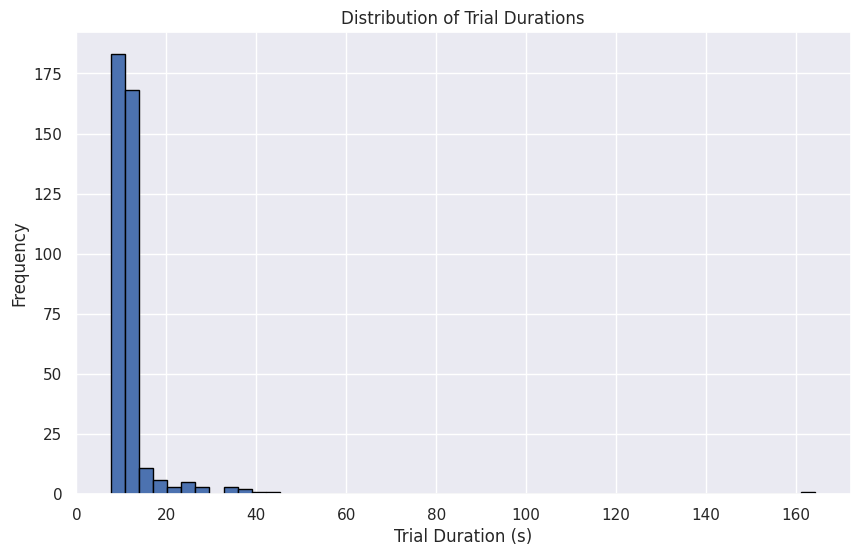

In [7]:
if nwb and "trials" in nwb.intervals:
    trials_df = nwb.trials.to_dataframe()
    # Calculate trial durations
    trial_durations = trials_df['stop_time'] - trials_df['start_time']

    # Plot histogram of trial durations
    import matplotlib.pyplot as plt
    import seaborn as sns

    sns.set_theme()

    plt.figure(figsize=(10, 6))
    plt.hist(trial_durations, bins=50, edgecolor='black')
    plt.xlabel('Trial Duration (s)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Trial Durations')
    plt.grid(True)
    plt.show()
else:
    print("NWB file not loaded or trials data not found.")

### Electrodes

Information about the electrodes used for recording is available in the `electrodes` table.

In [8]:
if nwb and nwb.electrodes:
    electrodes_df = nwb.electrodes.to_dataframe()
    print("Electrodes DataFrame (first 5 rows):")
    print(electrodes_df.head())
    print(f"\nTotal number of electrodes: {len(electrodes_df)}")
    print(f"\nElectrode groups: {electrodes_df['group_name'].unique()}")
else:
    print("NWB file not loaded or electrodes data not found.")

Electrodes DataFrame (first 5 rows):
       x       y location        filtering  \
id                                           
0   20.0  1375.0  unknown  0.1 - 7500.0 Hz   
1   20.0  1325.0  unknown  0.1 - 7500.0 Hz   
2   20.0  1275.0  unknown  0.1 - 7500.0 Hz   
3   20.0  1225.0  unknown  0.1 - 7500.0 Hz   
4   20.0  1175.0  unknown  0.1 - 7500.0 Hz   

                                                group group_name  \
id                                                                 
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x12317...     shank1   
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x12317...     shank1   
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x12317...     shank1   
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x12317...     shank1   
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x12317...     shank1   

                  label  
id                       
0   shank1-electrode001  
1   shank1-electrode002  
2   shank1-electrode003  
3   shank1-electrode004  
4   sha

### Visualizing electrode locations

We can plot the location of each electrode, colored by its group.

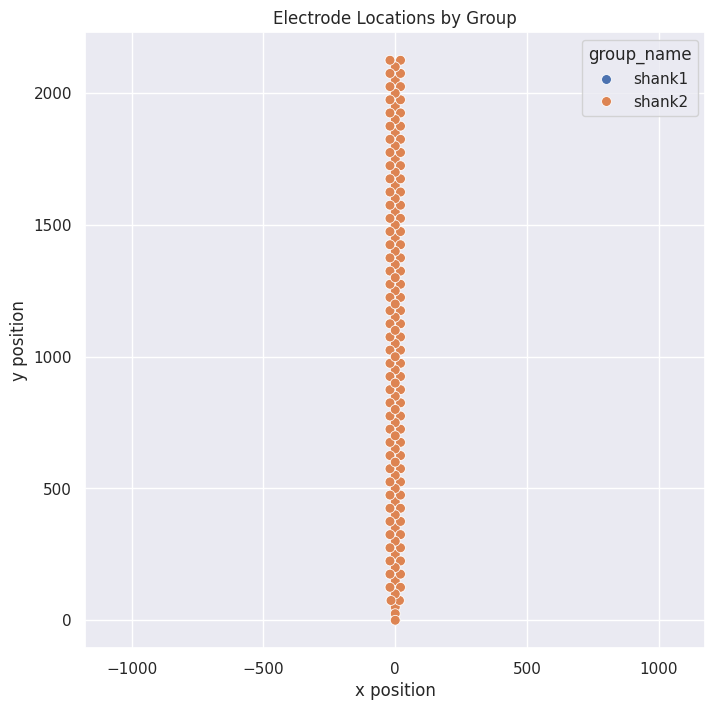

In [9]:
if nwb and nwb.electrodes:
    electrodes_df = nwb.electrodes.to_dataframe()
    # Plot electrode locations, colored by group
    import matplotlib.pyplot as plt
    import seaborn as sns

    sns.set_theme()

    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=electrodes_df, x='x', y='y', hue='group_name', s=50)
    plt.xlabel('x position')
    plt.ylabel('y position')
    plt.title('Electrode Locations by Group')
    plt.grid(True)
    plt.axis('equal') # Ensure equal scaling for x and y axes
    plt.show()
else:
    print("NWB file not loaded or electrodes data not found.")

### Units: Spike Times

The `units` table contains the results of spike sorting, specifically the spike times for each identified unit.

In [10]:
if nwb and nwb.units:
    units_df = nwb.units.to_dataframe()
    print("Units DataFrame (first 5 rows):")
    print(units_df.head())
    print(f"\nTotal number of units: {len(units_df)}")
else:
    print("NWB file not loaded or units data not found.")

Units DataFrame (first 5 rows):
                                          spike_times
id                                                   
1   [3.5485, 3.5543666666666667, 3.784666666666667...
2   [0.1826, 0.21976666666666667, 0.77823333333333...
3   [0.005533333333333334, 0.01633333333333333, 0....
4   [0.5452333333333333, 0.5632, 0.572833333333333...
5   [0.07036666666666666, 0.1002, 0.17066666666666...

Total number of units: 33


### Visualizing spike times for a subset of units (narrow time window)

We will visualize the spike times for the first few units for a narrow time window to see individual spike events.

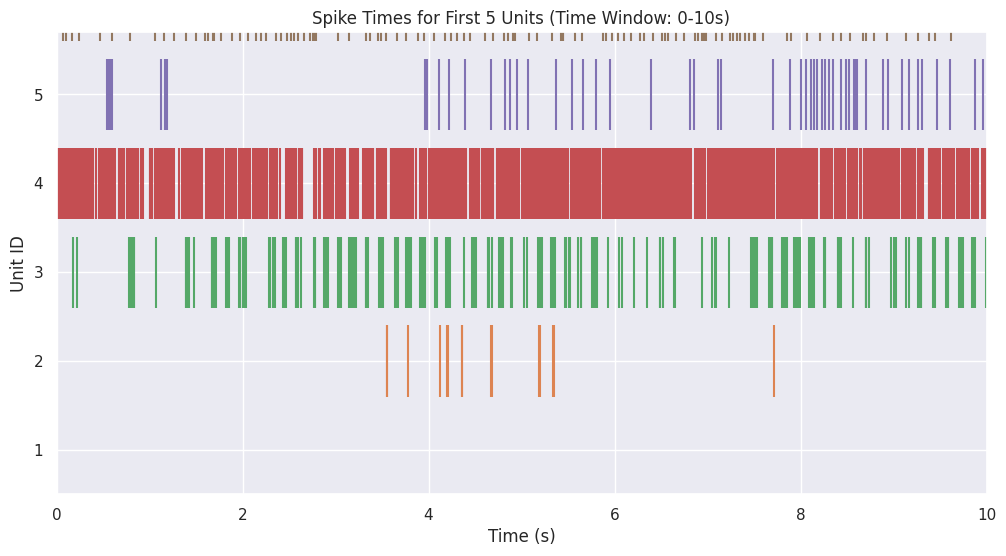

In [11]:
if nwb and nwb.units:
    units_df = nwb.units.to_dataframe()
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns

    sns.set_theme()

    # Select the first few units
    num_units_to_plot = min(5, len(units_df)) # Plot at most 5 units
    selected_units = units_df.iloc[0:num_units_to_plot]

    # Define a narrow time window (e.g., first 10 seconds)
    time_window_start = 0
    time_window_end = 10

    plt.figure(figsize=(12, 6))
    for index, row in selected_units.iterrows():
        spike_times = row['spike_times']
        # Filter spike times within the time window
        spike_times_window = spike_times[(spike_times >= time_window_start) & (spike_times <= time_window_end)]
        # Plot spike times as vertical lines
        plt.vlines(spike_times_window, index, index + 0.8, label=f'Unit {row.name}', color=sns.color_palette()[index % len(sns.color_palette())])

    plt.xlabel('Time (s)')
    plt.ylabel('Unit ID')
    plt.title(f'Spike Times for First {num_units_to_plot} Units (Time Window: {time_window_start}-{time_window_end}s)')
    plt.yticks(np.arange(num_units_to_plot) + 0.4, selected_units.index) # Center y-ticks between lines
    plt.ylim(-0.1, num_units_to_plot + 0.1)
    plt.xlim(time_window_start, time_window_end) # Set x-axis limits to the time window
    plt.grid(True)
    plt.show()
else:
    print("NWB file not loaded or units data not found.")

### Trial-aligned analysis example (Raw Electrophysiology)

As an example of aligning neural data to behavioral events, let's plot the average raw electrophysiology trace for a few channels centered around the start of the first few trials. This requires loading a small window of data around each trial start time and averaging.

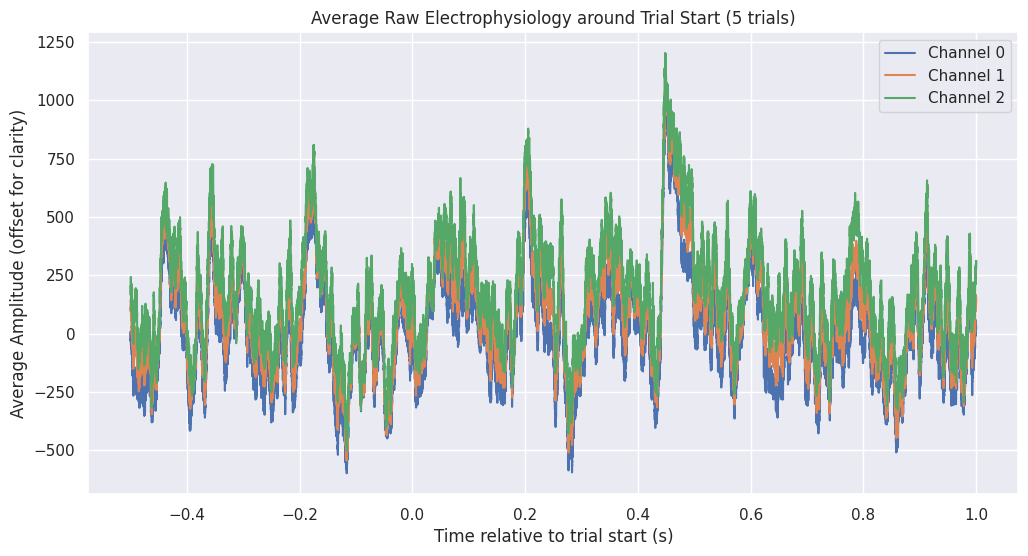

In [12]:
if nwb and "time_series" in nwb.acquisition and "trials" in nwb.intervals:
    time_series = nwb.acquisition["time_series"]
    trials_df = nwb.trials.to_dataframe()

    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns

    sns.set_theme()

    # Select the first few trials and channels
    num_trials_to_average = min(5, len(trials_df))
    num_channels_to_plot = min(3, time_series.data.shape[1])
    trials_to_average = trials_df.iloc[0:num_trials_to_average]
    channels_to_plot = [0, 1, 2] # Example channels

    # Define a time window around trial start (e.g., 0.5s before to 1s after)
    pre_trial_window = 0.5 # seconds
    post_trial_window = 1.0 # seconds
    rate = time_series.rate

    # Collect data for averaging
    aligned_data = []
    t_window = np.arange(int(-pre_trial_window * rate), int(post_trial_window * rate)) / rate

    for index, trial in trials_to_average.iterrows():
        trial_start_time = trial['start_time']
        # Find samples around trial start time
        start_sample = int((trial_start_time - time_series.starting_time - pre_trial_window) * rate)
        end_sample = int((trial_start_time - time_series.starting_time + post_trial_window) * rate)

        # Ensure samples are within data bounds
        if start_sample >= 0 and end_sample <= time_series.data.shape[0]:
            aligned_data_trial = time_series.data[start_sample:end_sample, channels_to_plot]
            aligned_data.append(aligned_data_trial)

    if aligned_data:
        # Average across trials
        average_data = np.mean(np.array(aligned_data), axis=0)

        # Plot average trace for selected channels
        plt.figure(figsize=(12, 6))
        for i, channel_index in enumerate(channels_to_plot):
             plt.plot(t_window, average_data[:, i] + i * 100, label=f'Channel {channel_index}') # Offset for clarity
        plt.xlabel('Time relative to trial start (s)')
        plt.ylabel('Average Amplitude (offset for clarity)')
        plt.title(f'Average Raw Electrophysiology around Trial Start ({num_trials_to_average} trials)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("No valid trial data found within data bounds for aligning.")
else:
    print("NWB file not loaded or required data for trial alignment not found.")

## Summary and Future Directions

This notebook has demonstrated how to load a Dandiset and explore the contents of an NWB file using the DANDI API and PyNWB. We have visualized subsets of the raw electrophysiology data, trial durations, electrode locations, and spike times. We also showed an example of aligning raw electrophysiology data to trial start times.

This Dandiset investigates the effect of disrupting septal GABAergic activity using DREADDs. Future analyses could focus on comparing neural activity and behavioral metrics between experimental groups (e.g., DREADD vs control) to assess the impact of the intervention.

Possible future directions for analysis include:

* Analyzing the raw electrophysiology data more deeply (e.g., filtering, spectral analysis).
* Investigating the relationship between neural activity (raw data or spike times) and behavioral events (trial times) in more detail.
* Exploring the properties of the sorted units in more detail.
* Analyzing data from other NWB files in the Dandiset.
* Comparing data across subjects or experimental conditions (e.g., DREADD manipulation).